# MNIST Canvas

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [13]:
class MNISTWorld():
    def __init__(self):
        self.side = 28
        self.max_steps = 4*self.side
        self.mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
        self.reset()
        
    def move_pen(self, action):
        if action is 0:
            self.pen_coord += np.asarray([0,1])
        elif action is 1:
            self.pen_coord += np.asarray([1,1])
        elif action is 2:
            self.pen_coord += np.asarray([1,0])
        elif action is 3:
            self.pen_coord += np.asarray([1,-1])
        elif action is 4:
            self.pen_coord += np.asarray([0,-1])
        elif action is 5:
            self.pen_coord += np.asarray([-1,-1])
        elif action is 6:
            self.pen_coord += np.asarray([-1,0])
        else:
            self.pen_coord += np.asarray([-1,1])
        
        r1 = 0
        if np.min(self.pen_coord) < 0 or np.max(self.pen_coord) >= self.side:
            r1 += -5
        self.pen_coord = self.pen_coord % self.side
        self.canvas[self.pen_coord[0], self.pen_coord[1]] = 1
        
        r2 = self.reward()
#         r2 = 0 if r2 < 0 else r2
        return r1 + r2
    
    def step(self, action):
        reward = self.move_pen(action)
        
        o1 = (self.template != self.canvas)*self.template
        o2 = np.zeros_like(o1); o2[self.pen_coord[0], self.pen_coord[1]] = 1
        observation = np.concatenate((o1,o2)).ravel().astype(np.float)
        
        done = False if self.global_step < self.max_steps else True
        self.global_step += 1
        info = None
        return observation, reward, done, info
    
    def reset(self):
        self.global_step = 0
        self.pen_coord = np.ones(2) * self.side/2
        self.canvas = np.zeros((self.side, self.side))
        
        batch = self.mnist.train.next_batch(1)
        self.template = np.reshape(batch[0],(self.side,self.side))
        
        self.prev_cost = self.cost()
        
        o1 = (self.template != self.canvas)*self.template
        o2 = np.zeros_like(o1); o2[self.pen_coord[0], self.pen_coord[1]] = 1
        observation = np.concatenate((o1.ravel(),o2.ravel())).astype(np.float)
        return observation
        
    def reward(self):
        cost = self.cost()
        r = -1*(cost - self.prev_cost)
        self.prev_cost = cost
        return r
    
    def cost(self):
        cost = .5*np.sum((self.template - self.canvas)**2) #/ np.sum((self.template - self.canvas) != 0)
        return cost

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.496078491211
0.488235354424
0.0
0.492156922817
0.496078491211
0.0
0.0
0.0
0.45294123888
0.0
0.492156922817
0.0
0.0
0.488235354424
0.492156922817
0.174509823322
-0.343137249351
-0.5
-0.5
-0.5
-0.5
0.0
-0.5
0.0
0.0
-0.5
-0.5
-0.5
-0.5
-0.5
0.0
-0.5
0.0
-0.5
-0.5
-0.5
-0.5
-0.5
0.0
0.0
0.0
0.0
0.0
0.0
-0.5
-0.5
-0.5
0.0
0.0
0.0
-0.5
0.0
-0.5
0.0
-0.343137249351
0.0
0.0
0.0
-0.5
-0.5
0.0
0.0
-0.5
0.0
0.0
0.0
0.0
-0.421568624675
0.45294123888
-0.5
0.296078503132
-0.0176470279694
-0.5
-0.5
-0.5
0.0
0.0
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
-0.5
0.0
-0.5
-0.5
-0.5
0.0
0.0
-0.5
-0.5
0.0
-0.5
-0.5
-0.5
0.0
0.0
0.0
-0.5
-0.5
-0.5
-5.5
-5.5
-0.5
-0.5


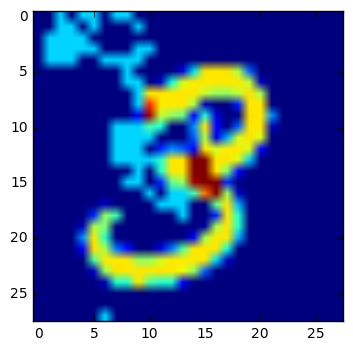

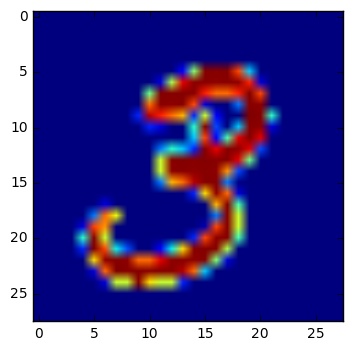

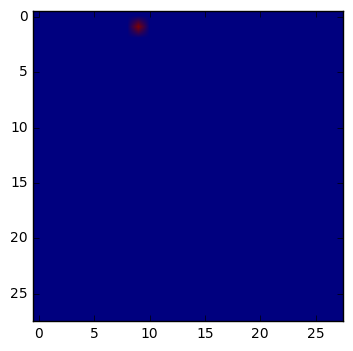

In [14]:
env = MNISTWorld()
o = env.reset()

done = False
while not done:
    action = np.random.randint(8)
    observation, reward, done, info = env.step(action)
#     if reward > .1: print reward
    print reward

plt.figure(0)
plt.imshow(env.canvas + 2*env.template)
plt.figure(1)
plt.imshow(np.reshape(observation[:28**2],(28,28)))
plt.figure(2)
plt.imshow(np.reshape(observation[28**2:],(28,28)))

In [15]:
print env.template

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

In [10]:
o = env.reset()
plt.figure(0)
plt.imshow(np.reshape(o, (28,28)))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged